# Base Monomial

In [12]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

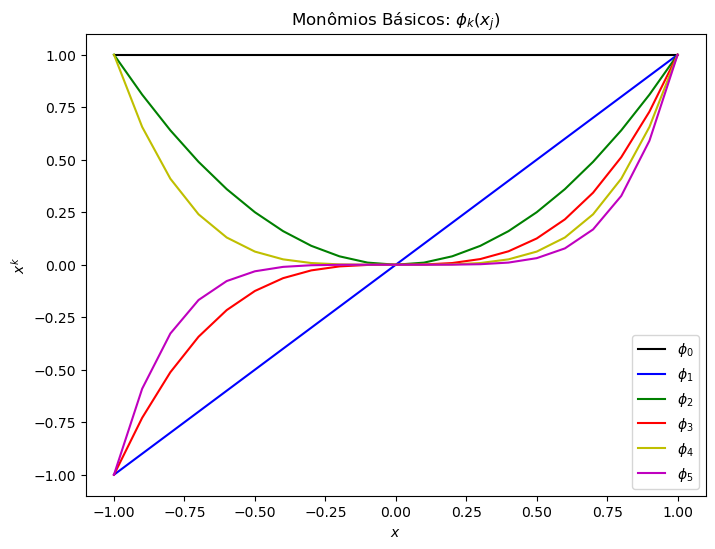

In [13]:
x = np.arange(-1.0, 1.1, 0.1)
n = 6 #grau do monômio n-1
m = len(x)
phik = np.zeros((m, n))
tipos = ["k-", "b-", "g-", "r-", "y-", "m-"]
legenda = []
for i in range(n):
    legenda.append('$\phi_{' + str(i) + "}$")
    # plt.style.use("seaborn-poster")
    fig = plt.figure(figsize = (8, 6))
for k in range(n):
    phik[:, k] = x**k
    plt.plot(x, phik[:, k], tipos[k], label = legenda[k])
plt.title("Monômios Básicos: $ \phi_{k}(x_j)$")

plt.xlabel("$x$")
plt.ylabel("$x^{k}$")

plt.legend()
plt.show()

## Problema do "topógrafo"

In [14]:
import numpy.polynomial.polynomial as poly

coeficientes de p é:  [-1.15000000e+02  2.65150000e+02 -2.22933333e+02  9.12708333e+01
 -1.94791667e+01  2.07916667e+00 -8.75000000e-02]
O valor da elevação para x=3,5 é igual a p(3.5) =  3.4052734375000426


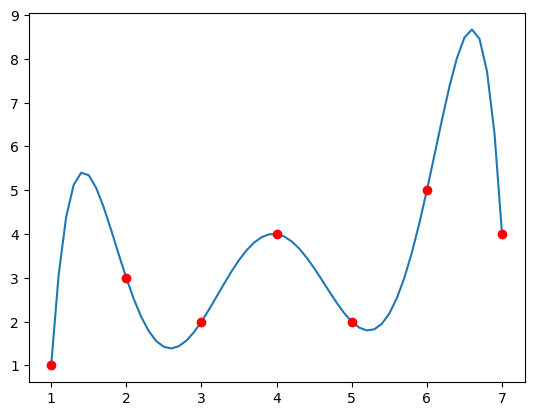

In [18]:
def subRet(U, c):
    n = c.size
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (c[i] - U[i, i+1:]@x[i + 1:])/U[i ,i]
    return x

def elimGauss(A, b):
    U = np.copy(A)
    c = np.copy(b)
    n = c.size
    for j in range(n - 1):
        for i in range(j + 1, n):
            m = U[i,j]/U[j,j]
            U[i,j:] -= m*U[j,j:]
            c[i] -= m*c[j]
    x = subRet(U,c)
    return x

def monomio(x, y):
    # definir a matriz A
    A = np.vander(x, increasing=True)
    cj = elimGauss(A,y)
    return cj

x = np.arange(1.0, 8.0)
y = np.array([1., 3., 2., 4., 2., 5., 4.])
coef = monomio(x,y)
print("coeficientes de p é: ", coef)

x_new = np.arange(1.0, 7.1, 0.1)
p = poly.Polynomial(coef)
print("O valor da elevação para x=3,5 é igual a p(3.5) = ", p(3.5))

plt.plot(x_new, p(x_new), x, y, 'ro')
plt.show()